In [1]:
import pandas as pd

In [31]:
data = pd.read_excel('TOTAL drc.xlsx')

In [32]:
data

,V0001,V0026,V0031,A005010,A009010,A01501,C006,C008,C009,I00102,...,S083,T004,T005,Y001,Y00101,Y002,Y003,Y004,H001,VDR001
0,11,1,1,2,1,3.0,1,61,1,2,...,NaN,2,NaN,4.0,NaN,3.0,NaN,NaN,4.0,NaN
1,11,1,1,1,1,1.0,2,57,4,2,...,NaN,2,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN
2,11,1,1,2,5,4.0,2,21,4,1,...,NaN,2,NaN,1.0,16.0,1.0,2.0,1.0,1.0,6.0
3,11,1,1,2,1,3.0,2,41,2,2,...,NaN,2,NaN,4.0,NaN,1.0,3.0,NaN,3.0,NaN
4,11,1,1,2,1,3.0,1,51,2,2,...,NaN,2,NaN,4.0,NaN,2.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,53,1,1,1,1,1.0,2,62,4,2,...,NaN,2,NaN,3.0,NaN,2.0,NaN,NaN,1.0,NaN
2570,53,1,1,1,1,1.0,2,69,4,2,...,NaN,2,NaN,3.0,NaN,1.0,3.0,NaN,1.0,NaN
2571,53,1,1,1,6,1.0,2,49,4,2,...,NaN,2,NaN,1.0,17.0,2.0,NaN,NaN,3.0,NaN
2572,53,1,1,1,1,1.0,1,37,4,1,...,NaN,2,NaN,1.0,11.0,1.0,3.0,NaN,4.0,NaN


In [33]:
data.shape

(2574, 66)

In [34]:
print(data.nunique())

V0001      27
V0026       2
V0031       4
A005010     6
A009010     6
           ..
Y002        3
Y003        4
Y004        5
H001        5
VDR001      8
Length: 66, dtype: int64


In [35]:
print(data.isnull().sum())

V0001         0
V0026         0
V0031         0
A005010       0
A009010       0
           ... 
Y002         71
Y003        894
Y004       1893
H001         44
VDR001     2140
Length: 66, dtype: int64


In [36]:
data.dtypes

V0001        int64
V0026        int64
V0031        int64
A005010      int64
A009010      int64
            ...   
Y002       float64
Y003       float64
Y004       float64
H001       float64
VDR001     float64
Length: 66, dtype: object

In [37]:
colunas_com_nulos = data.columns[data.isna().sum() > 0]

# Iterar sobre essas colunas e imprimir as informações apenas se o número de nulos for maior que zero
for coluna in colunas_com_nulos:
    num_nulos = data[coluna].isna().sum()
    print(f'Coluna "{coluna}" tem {num_nulos} valores vazios.')

Coluna "A01501" tem 15 valores vazios.
Coluna "J012" tem 438 valores vazios.
Coluna "N004" tem 114 valores vazios.
Coluna "N005" tem 114 valores vazios.
Coluna "P00104" tem 20 valores vazios.
Coluna "P00404" tem 20 valores vazios.
Coluna "P02801" tem 2066 valores vazios.
Coluna "P029" tem 1782 valores vazios.
Coluna "P03201" tem 1782 valores vazios.
Coluna "P03202" tem 2248 valores vazios.
Coluna "P035" tem 1627 valores vazios.
Coluna "P036" tem 1670 valores vazios.
Coluna "P038" tem 1210 valores vazios.
Coluna "P051" tem 2543 valores vazios.
Coluna "P052" tem 316 valores vazios.
Coluna "P053" tem 1622 valores vazios.
Coluna "P05401" tem 2258 valores vazios.
Coluna "P05402" tem 2369 valores vazios.
Coluna "Q00201" tem 33 valores vazios.
Coluna "Q003" tem 1668 valores vazios.
Coluna "Q03001" tem 153 valores vazios.
Coluna "Q031" tem 2232 valores vazios.
Coluna "Q064" tem 2278 valores vazios.
Coluna "S082" tem 2515 valores vazios.
Coluna "S083" tem 2574 valores vazios.
Coluna "T005" tem 

In [38]:
data = data.astype('category')

colunas_nume = [
    'P00102', 'P00404', 'P00104', 'C008', 'J012', 'P00104', 'P00404', 'P02801', 'P029', 'P03202', 'P035',
    'P053', 'P05402', 'Q003', 'Q031', 'Q064', 'Y00101'
]


for coluna in colunas_nume:
    try:
        data[coluna] = pd.to_numeric(data[coluna], errors='coerce')
    except ValueError:
        print(f"A coluna {coluna} contém valores não numéricos e não pode ser convertida.")

print(data.dtypes)

V0001      category
V0026      category
V0031      category
A005010    category
A009010    category
             ...   
Y002       category
Y003       category
Y004       category
H001       category
VDR001     category
Length: 66, dtype: object


In [39]:
data[data.duplicated(keep=False)]

,V0001,V0026,V0031,A005010,A009010,A01501,C006,C008,C009,I00102,...,S083,T004,T005,Y001,Y00101,Y002,Y003,Y004,H001,VDR001


In [40]:
data.columns

Index(['V0001', 'V0026', 'V0031', 'A005010', 'A009010', 'A01501', 'C006',
       'C008', 'C009', 'I00102', 'J01101', 'J012', 'M01601', 'N001', 'N00101',
       'N004', 'N005', 'N010', 'N011', 'N012', 'N013', 'N014', 'N015', 'N016',
       'P00102', 'P00104', 'P00404', 'P02601', 'P027', 'P02801', 'P029',
       'P03201', 'P03202', 'P034', 'P035', 'P036', 'P038', 'P04501', 'P04502',
       'P050', 'P051', 'P052', 'P053', 'P05401', 'P05402', 'P06701', 'Q00101',
       'Q00201', 'Q074', 'Q124', 'Q003', 'Q03001', 'Q031', 'Q06306', 'Q064',
       'S082', 'S083', 'T004', 'T005', 'Y001', 'Y00101', 'Y002', 'Y003',
       'Y004', 'H001', 'VDR001'],
      dtype='object')

In [41]:
data.rename(columns={
    'C006': 'Sexo',
    'V0001':'Estado',
    'V0026':'local',
    'V0031':'tipo_cidade',
    'A005010':'abast_agua',
    'A009010':'agua_usada',
    'A01501':'esgoto',
    'C008':'idade',
    'C009':'raca',
    'I00102':'plano_saude',
    'M01601':'freq_exercfis',
    'J01101':'ultima_vez_med',
    'J012':'vez_med_ult12mes',
    'N001':'av_saude',
    'N00101':'av_prop_saude',
    'N004':'desconf_peito',
    'N005':'desconf_peito',
    'N010':'prob_sono',
    'N011':'cansado',
    'N012':'prazer',
    'N013':'concentracao',
    'N014':'falta_apetite',
    'N015':'agitado',
    'N016':'deprimido',
    'P00102':'sabe_peso',
    'P00104':'peso',
    'P00404':'altura',
    'P02601':'consumo_sal',
    'P027':'freq_alcool',
    'P02801':'dias_alcool',
    'P029':'doses_no_dia',
    'P03201':'consumo_alto_alcool',
    'P03202':'num_dose',
    'P034':'pratica_exerc',
    'P035':'dias_exerc',
    'P036':'exercicio_frequente',
    'P038':'anda_muito',
    'P04501':'horas_tv',
    'P04502':'horas_internet',
    'P050':'fuma_tabaco',
    'P051':'passado_fumo_diario',
    'P052':'passado_tabaco',
    'P053':'idade_cigarro',
    'P05401':'media_cigarros',
    'P05402':'cigarros_dia',
    'P06701':'uso_vape',
    'Q00101':'freq_pressao',
    'Q00201':'hipertensao',
    'Q003':'idade_hipert',
    'Q03001':'diabete',
    'Q031':'idade_diabete',
    'Q06306':'infarto',
    'Q064':'doenca_coracao',
    'Q074':'asma',
    'S082':'result_sifilis',
    'S083':'trat_sifilis',
    'T004':'diag_ist',
    'T005':'tratamento_ist',
    'Y001':'idade_sex_mor',
    'Y00101':'idade_sex',
    'Y002':'relac_sex_12mes',
    'Y003':'freq_uso_camis',
    'Y004':'uso_camis_12meses',
    'H001':'ultima_vez_medico',
    'VDR001':'Metodo_contraceptivo'
   
}, inplace=True)

data.head()

,Estado,local,tipo_cidade,abast_agua,agua_usada,esgoto,Sexo,idade,raca,plano_saude,...,trat_sifilis,diag_ist,tratamento_ist,idade_sex_mor,idade_sex,relac_sex_12mes,freq_uso_camis,uso_camis_12meses,ultima_vez_medico,Metodo_contraceptivo
0,11,1,1,2,1,3.0,1,61,1,2,...,NaN,2,NaN,4.0,NaN,3.0,NaN,NaN,4.0,NaN
1,11,1,1,1,1,1.0,2,57,4,2,...,NaN,2,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN
2,11,1,1,2,5,4.0,2,21,4,1,...,NaN,2,NaN,1.0,16.0,1.0,2.0,1.0,1.0,6.0
3,11,1,1,2,1,3.0,2,41,2,2,...,NaN,2,NaN,4.0,NaN,1.0,3.0,NaN,3.0,NaN
4,11,1,1,2,1,3.0,1,51,2,2,...,NaN,2,NaN,4.0,NaN,2.0,NaN,NaN,2.0,NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Estado                2574 non-null   category
 1   local                 2574 non-null   category
 2   tipo_cidade           2574 non-null   category
 3   abast_agua            2574 non-null   category
 4   agua_usada            2574 non-null   category
 5   esgoto                2559 non-null   category
 6   Sexo                  2574 non-null   category
 7   idade                 2574 non-null   int64   
 8   raca                  2574 non-null   category
 9   plano_saude           2574 non-null   category
 10  ultima_vez_med        2574 non-null   category
 11  vez_med_ult12mes      2136 non-null   float64 
 12  freq_exercfis         2574 non-null   category
 13  av_saude              2574 non-null   category
 14  av_prop_saude         2574 non-null   category
 15  desc

In [43]:
valores_null = data.isnull().sum()

# Filtrar colunas com valores nulos maiores que zero
colunas_com_valores_null = valores_null[valores_null > 0]

# Exibir colunas com valores nulos maiores que zero
print("Colunas com valores nulos:")
print(colunas_com_valores_null)

Colunas com valores nulos:
esgoto                    15
vez_med_ult12mes         438
desconf_peito            114
desconf_peito            114
peso                      20
altura                    20
dias_alcool             2066
doses_no_dia            1782
consumo_alto_alcool     1782
num_dose                2248
dias_exerc              1627
exercicio_frequente     1670
anda_muito              1210
passado_fumo_diario     2543
passado_tabaco           316
idade_cigarro           1622
media_cigarros          2258
cigarros_dia            2369
hipertensao               33
idade_hipert            1668
diabete                  153
idade_diabete           2232
doenca_coracao          2278
result_sifilis          2515
trat_sifilis            2574
tratamento_ist          2559
idade_sex_mor             44
idade_sex                565
relac_sex_12mes           71
freq_uso_camis           894
uso_camis_12meses       1893
ultima_vez_medico         44
Metodo_contraceptivo    2140
dtype: int64


In [44]:
porcentagem_null = (data.isna().sum() / data.shape[0])

# Filtrar apenas as colunas que têm valores nulos
porcentagem_null_filt = porcentagem_null[porcentagem_null > 0]

data_nulos=(
porcentagem_null_filt.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
trat_sifilis,100.00%
tratamento_ist,99.42%
passado_fumo_diario,98.80%
result_sifilis,97.71%
cigarros_dia,92.04%
doenca_coracao,88.50%
media_cigarros,87.72%
num_dose,87.33%
idade_diabete,86.71%
Metodo_contraceptivo,83.14%


In [45]:
data.drop(columns=['doses_no_dia', 'trat_sifilis', 'tratamento_ist', 'passado_fumo_diario', 
        'result_sifilis', 'cigarros_dia', 'num_dose', 'Metodo_contraceptivo', 'media_cigarros',
        'dias_alcool', 'doenca_coracao', 'idade_diabete', 'uso_camis_12meses', 'consumo_alto_alcool'], inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Estado               2574 non-null   category
 1   local                2574 non-null   category
 2   tipo_cidade          2574 non-null   category
 3   abast_agua           2574 non-null   category
 4   agua_usada           2574 non-null   category
 5   esgoto               2559 non-null   category
 6   Sexo                 2574 non-null   category
 7   idade                2574 non-null   int64   
 8   raca                 2574 non-null   category
 9   plano_saude          2574 non-null   category
 10  ultima_vez_med       2574 non-null   category
 11  vez_med_ult12mes     2136 non-null   float64 
 12  freq_exercfis        2574 non-null   category
 13  av_saude             2574 non-null   category
 14  av_prop_saude        2574 non-null   category
 15  desconf_peito        

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Distribuição da variável alvo:


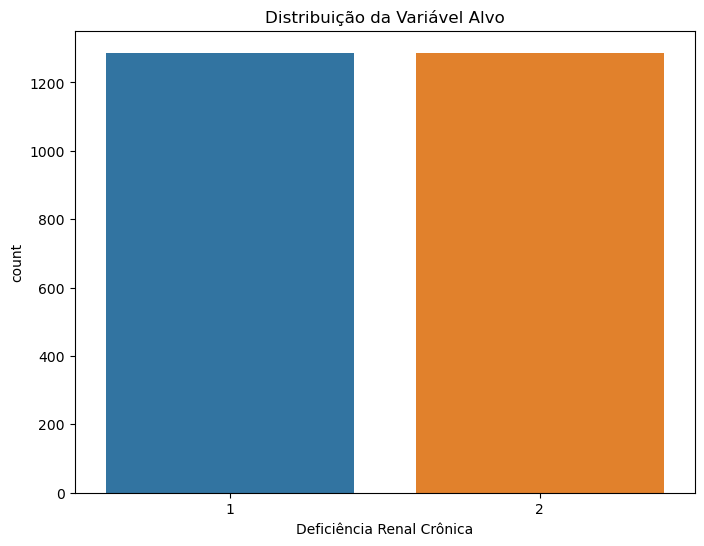

In [55]:
print("\nDistribuição da variável alvo:")
data['Q124'].value_counts()

# Visualizando a distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='Q124', data=data)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Deficiência Renal Crônica')
plt.show()

In [50]:
X = data.drop('Q124', axis=1)  # Features
y = data['Q124']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
decision_tree_model = DecisionTreeClassifier(max_depth=20, criterion= 'entropy', max_features= 'sqrt')

# Treinando o modelo com os dados de treinamento
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt')

In [53]:
y_pred_tree = decision_tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Métricas de Desempenho do Modelo de Árvore de Decisão:")
print(f"Acurácia: {accuracy_tree}")
print(f"Precisão: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"Pontuação F1: {f1_tree}")
print("\nMatriz de Confusão:")
print(conf_matrix_tree)

Métricas de Desempenho do Modelo de Árvore de Decisão:
Acurácia: 0.9844660194174757
Precisão: 0.9883720930232558
Recall: 0.9807692307692307
Pontuação F1: 0.9845559845559845

Matriz de Confusão:
[[255   5]
 [  3 252]]


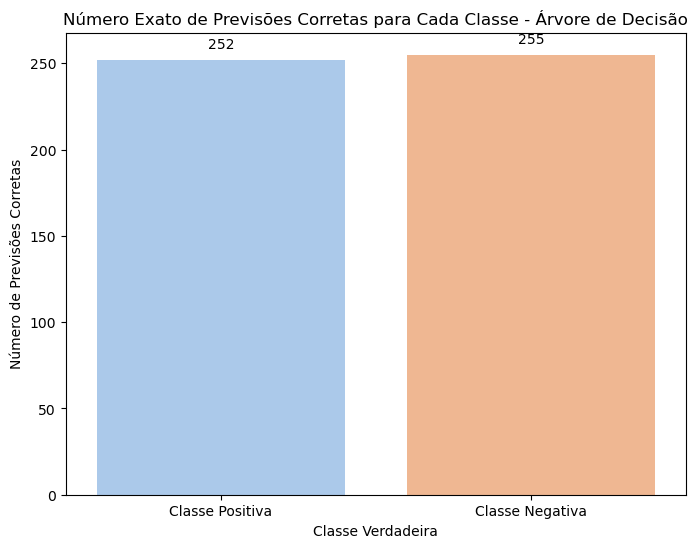

In [54]:
TP_tree = conf_matrix_tree[1, 1]  # Verdadeiros positivos (classe positiva corretamente prevista)
FP_tree = conf_matrix_tree[0, 1]  # Falsos positivos (classe negativa incorretamente prevista como positiva)
TN_tree = conf_matrix_tree[0, 0]  # Verdadeiros negativos (classe negativa corretamente prevista)
FN_tree = conf_matrix_tree[1, 0]  # Falsos negativos (classe positiva incorretamente prevista como negativa)

# Plotando o número exato de previsões corretas para cada classe para o modelo de Árvore de Decisão
plt.figure(figsize=(8, 6))
sns.barplot(x=['Classe Positiva', 'Classe Negativa'], y=[TP_tree, TN_tree], palette='pastel')
plt.title('Número Exato de Previsões Corretas para Cada Classe - Árvore de Decisão')
plt.xlabel('Classe Verdadeira')
plt.ylabel('Número de Previsões Corretas')
for i, v in enumerate([TP_tree, TN_tree]):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()